------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1580063 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2490011 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2780416 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1999606 seconds ----------------


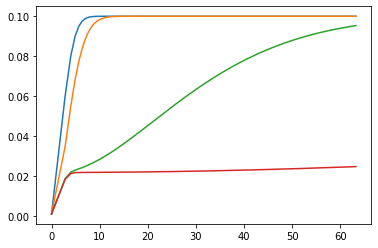

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,Diffusion_MS_iter,dlnai_dlnxi,vpure,D_Matrix
import matplotlib.pyplot as plt
nt=500

t=np.linspace(0.,4000.*60.,nt)
Mi=np.asarray([18.015,65000])
EJ=np.asarray([1E10])
etaJ=np.asarray([1E9])
exponent=np.asarray([0.,0.])
mobile=np.asarray([True,False])
Dvec=np.asarray([5E-14])
wi0=np.asarray([1E-3,1-1E-3])
wi8=np.asarray([0.1,0.9])
#ai0=np.asarray([0.001,1])
#ai8=np.asarray([0.25,1])
a10=np.asarray([0.001])
a18=np.asarray([0.25])
L=1E-5
dlna1_dlnw1=(np.log(a10)-np.log(a18))/(np.log(wi0[0])-np.log(wi8[0]))
#dlnai_dlnwi=np.subtract.outer(np.log(ai0),np.log(ai8))/np.subtract.outer(np.log(wi0),np.log(wi8))
dlnai_dlnwi=np.asarray([[[dlna1_dlnw1,0.],[0.,1.]]]*len(t))
rho0i=np.asarray([997.,1180])
etavec=np.asarray([1E9,1E12,1E14,1E16])
for etaJ in etavec:
    wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,dlnai_dlnwi=dlnai_dlnwi,EJ=EJ,etaJ=etaJ,exponent=exponent,rho0i=rho0i)
    plt.plot((t/60)**(1/2),wt[:,0])
# plt.plot(t,wt[:,2])
plt.show()